In [1]:
import torch
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
import torch.nn as nn 
import torch.nn.functional as F

class model(nn.Module):
    """ ReLU k shallow neural network
    Parameters: 
    input size: input dimension
    hidden_size1 : number of hidden layers 
    num_classes: output classes 
    k: degree of relu functions
    """
    def __init__(self, input_size, hidden_size1, num_classes,k = 1):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, num_classes,bias = False)
        self.k = k 
    def forward(self, x):
        u1 = self.fc2(F.relu(self.fc1(x))**self.k)
        return u1

def print_convergence_order(err, neuron_num_exponent): 

    neuron_nums = [2**j for j in range(2,neuron_num_exponent)]
    err_list = [err[i] for i in neuron_nums ] 

    print("neuron num \t\t error \t\t order")
    for i, item in enumerate(err_list):
        if i == 0: 
            print(neuron_nums[i], end = "\t\t")
            print(item, end = "\t\t")
            print("*")
        else: 
            print(neuron_nums[i], end = "\t\t")
            print(item, end = "\t\t") 
            print(np.log(err_list[i-1]/err_list[i])/np.log(2))


## ex1 

In [2]:
folder = 'ex1/'
experiment_label = 'ex1'
err_list_relu_4_rand = []
for k in [4]: 
    for s in [2**1, 2**2, 2**3, 2**4,2**5]: 
        N0 = 2**5 
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,s * N0))

        filename = folder + experiment_label +"_err_randDict_relu_{}_size_{}_num_neurons_{}.pt".format(k,s * N0,num_epochs)
        err = torch.load(filename)  
        err_list_relu_4_rand.append(err) 
        print_convergence_order(err,exponent+1) 

print("deterministic dictionary")
print() 

folder = 'ex1/'
experiment_label = 'ex1'
err_list_relu_4_deterministic = []

for k in [4]: 
    for N in [2**10, 2**12,2**14,2**16]: 
        if N ==2**16:
            continue 
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,N))

        filename = folder + experiment_label +"_err_deterministic_Dict_relu_{}_size_{}_num_neurons_{}.pt".format(k,N,num_epochs)
        err = torch.load(filename)   
        err_list_relu_4_deterministic.append(err) 
        print_convergence_order(err,exponent+1) 


relu 4, dict size 64
neuron num 		 error 		 order
4		tensor(0.1924, dtype=torch.float64)		*
8		tensor(0.1751, dtype=torch.float64)		tensor(0.1354, dtype=torch.float64)
16		tensor(0.1129, dtype=torch.float64)		tensor(0.6338, dtype=torch.float64)
32		tensor(0.1003, dtype=torch.float64)		tensor(0.1699, dtype=torch.float64)
64		tensor(0.0389, dtype=torch.float64)		tensor(1.3679, dtype=torch.float64)
128		tensor(0.0205, dtype=torch.float64)		tensor(0.9249, dtype=torch.float64)
256		tensor(0.0036, dtype=torch.float64)		tensor(2.5022, dtype=torch.float64)
512		tensor(0.0010, dtype=torch.float64)		tensor(1.9204, dtype=torch.float64)
relu 4, dict size 128
neuron num 		 error 		 order
4		tensor(0.1959, dtype=torch.float64)		*
8		tensor(0.1799, dtype=torch.float64)		tensor(0.1232, dtype=torch.float64)
16		tensor(0.1121, dtype=torch.float64)		tensor(0.6817, dtype=torch.float64)
32		tensor(0.1012, dtype=torch.float64)		tensor(0.1476, dtype=torch.float64)
64		tensor(0.0380, dtype=torch.float64)		ten

In [3]:
err_list_relu_4_deterministic[0].size()



torch.Size([513])

0

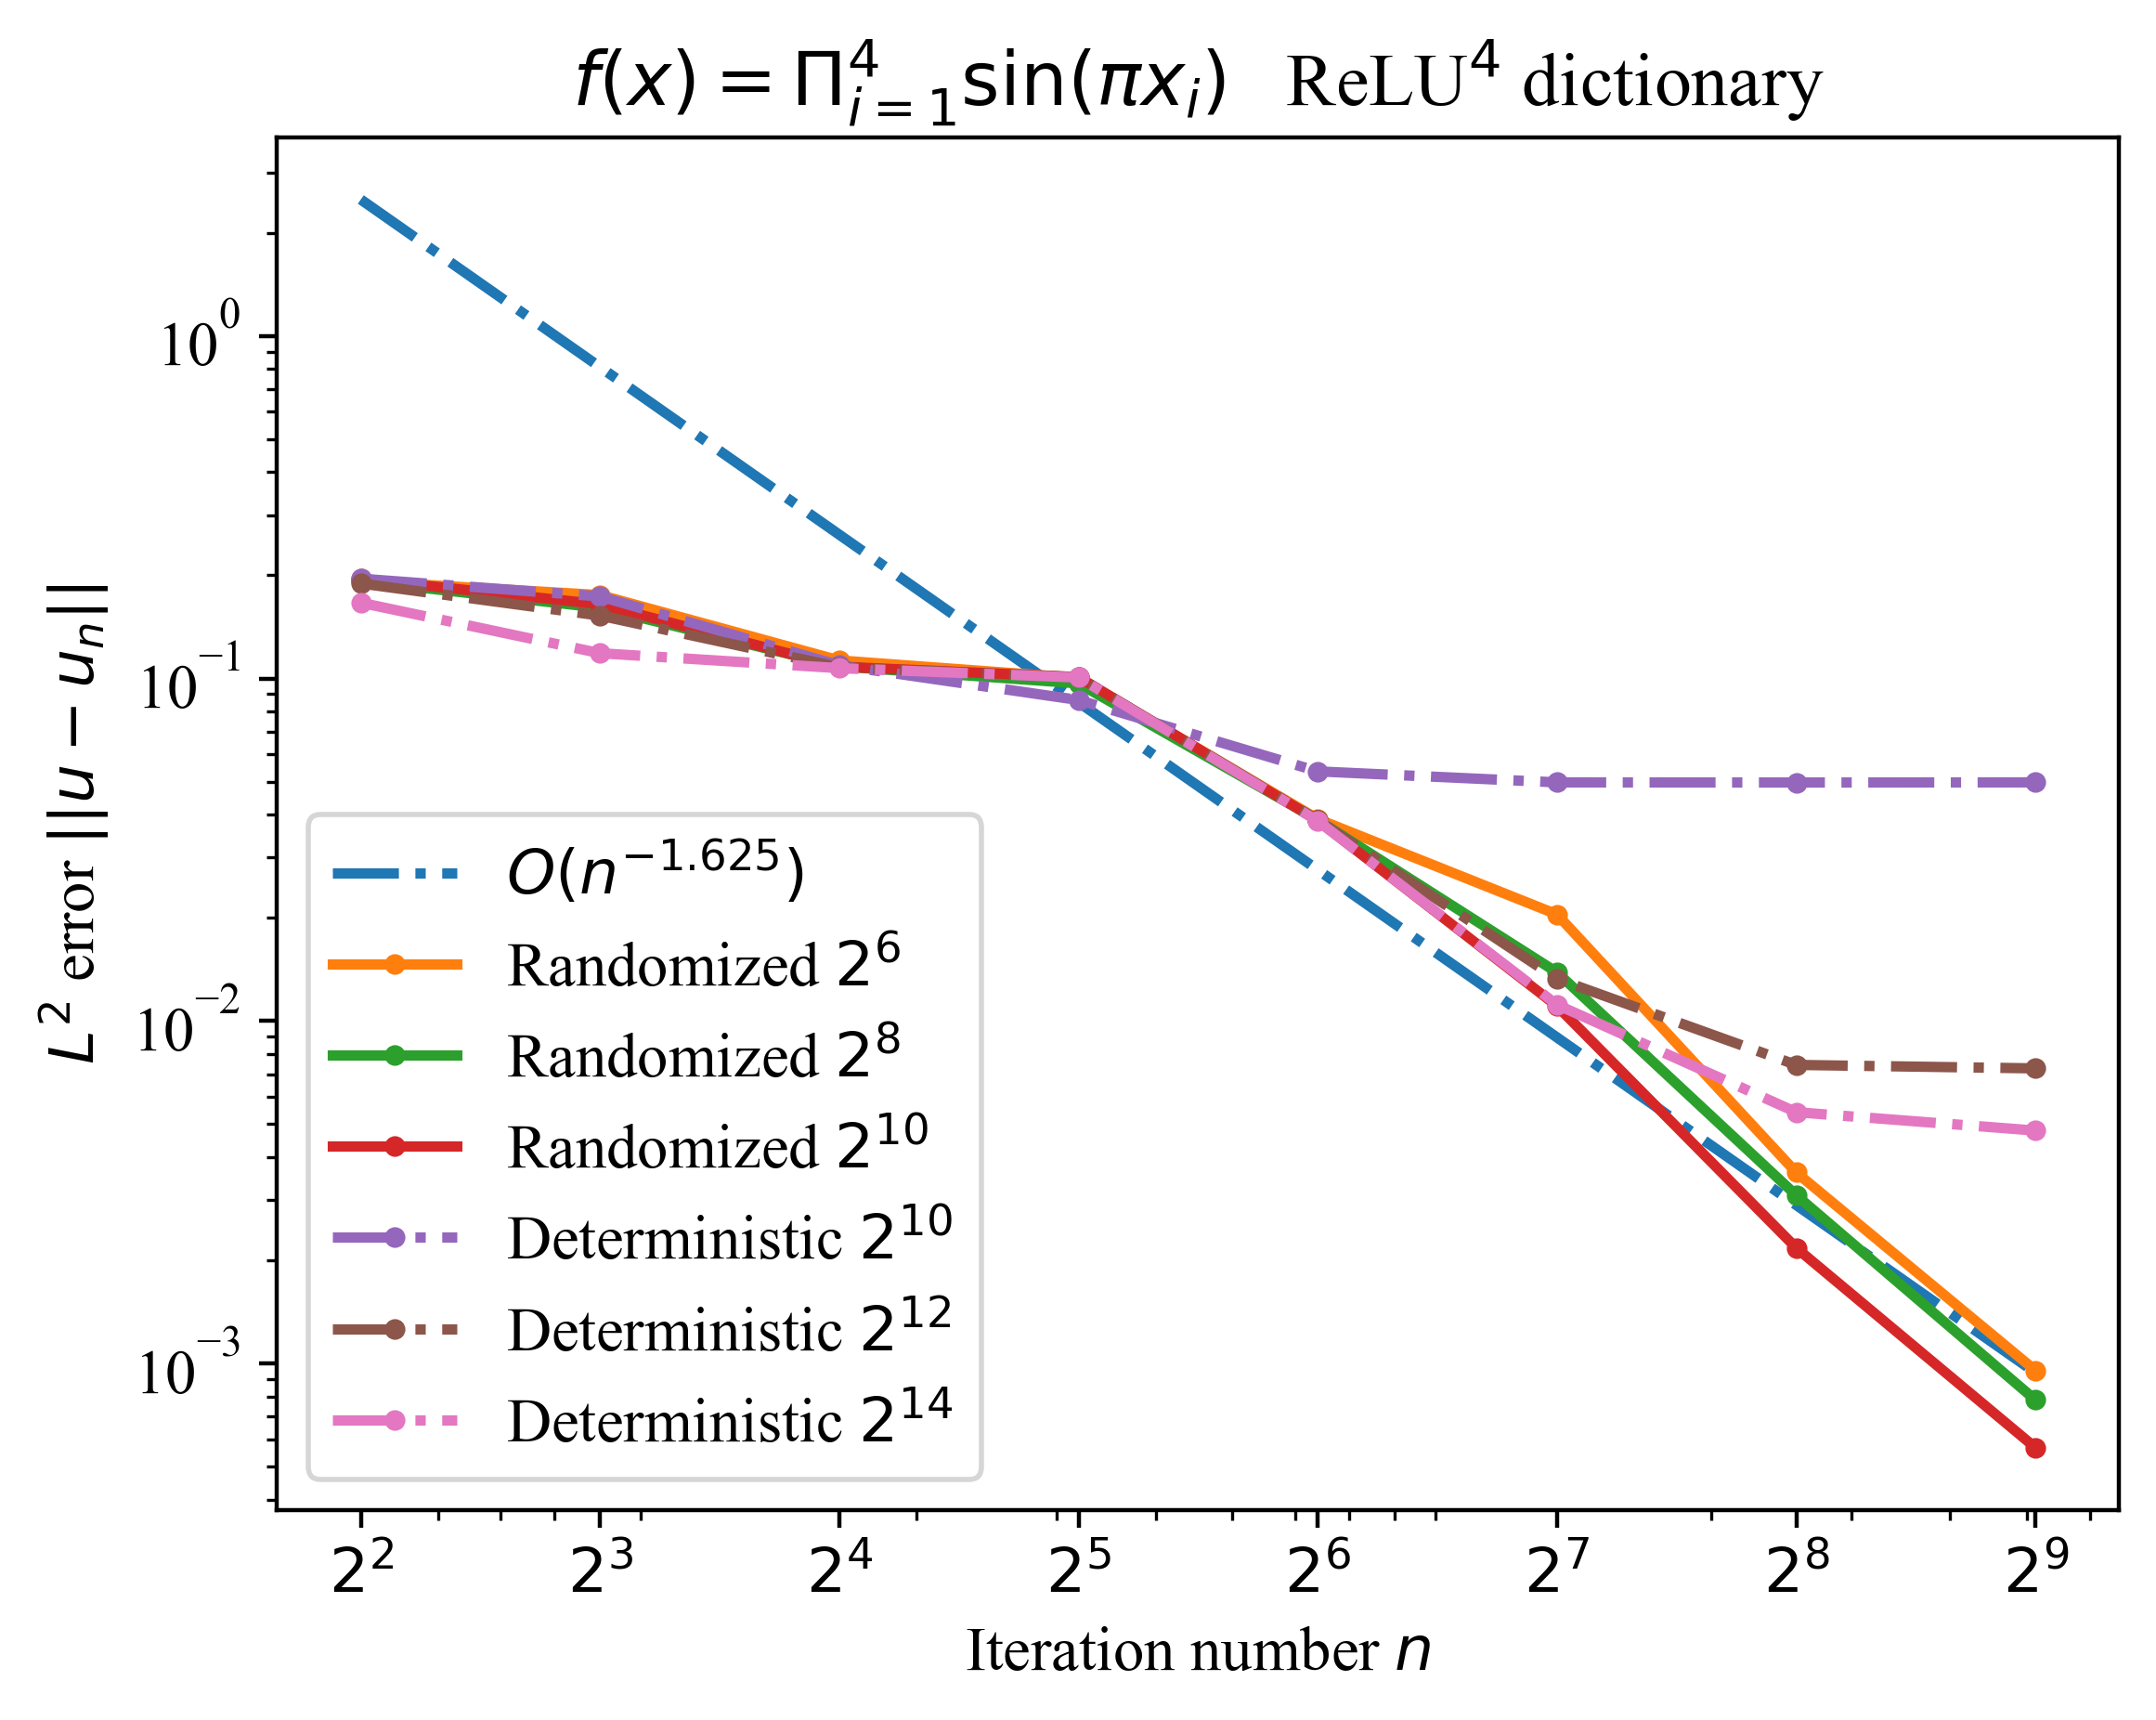

In [4]:
filename = "4D_sinpix1x2x3x4_rand_deter_relu4_Dict_compare.png"
k = 4 
d = 4 
def plot_err_vs_neurons(k,d,err_list_relu_4_rand,err_list_relu_4_deterministic,filename, fig_title, exponent = 9, save = False, rescale_ref = 12):
    """ Neuron numbers 2^2, 2^3, 2^4, ..., 2^9. 
    """
    rate = -1/2 - (2 * k + 1)/(2 * d)


    f_size = 12  # Increased font size
    line_width = 2  # Thickness of the lines
    # Set global font size
    plt.rcParams.update({'font.size': f_size})
    
    neuron_nums = np.array([2**j for j in range(2,exponent+1)])  
    rand_size_exp_list = [6,7,8,9,10] 
    # dictionary_size_list= [[2**3,2**3,2**2,2**2], [2**3,2**3,2**3,2**3],[2**4,2**4,2**3,2**3],[2**4,2**4,2**4,2**4]]
    dictionary_size_exp_list = [10,12,14,16]

    plt.figure(dpi = 400)
    x = np.array(range(4, 2**exponent+1))
    ref = err_list_relu_4_rand[0][2**2]* (x/ 4)**(rate)*rescale_ref

    plt.plot(x,ref,'-.',linewidth=line_width,label = '$O(n^{{{}}})$'.format(rate))

    for i, err in enumerate(err_list_relu_4_rand): 
        if rand_size_exp_list[i] == 7 or rand_size_exp_list[i] == 9:
            continue
        plt.plot(neuron_nums, err[neuron_nums],'.-',linewidth=line_width,
                 label = "Randomized $2^{{{}}}$".format(rand_size_exp_list[i]))

    for i, err in enumerate(err_list_relu_4_deterministic): 
        plt.plot(neuron_nums, err[neuron_nums],'.-.', linewidth=line_width,
                label = "Deterministic $2^{{{}}}$ ".format(dictionary_size_exp_list[i])) 
    
    plt.title( fig_title+"   ReLU$^{}$ dictionary".format(k))
    plt.yscale('log')
    plt.xscale('log')
    # plt.grid("True")
    plt.xlabel("Iteration number $n$")
    plt.ylabel("$L^2$ error $||u-u_n||$")
    plt.xticks(neuron_nums,[rf"$2^{{{ns}}}$" for ns in range(2,exponent+1)])
    plt.legend(loc='lower left')    

    if save:
        plt.savefig(filename) 
    else:
        plt.show()
    return 0 
## plot results 
## read data: 

filename = "4D_sinpix1x2x3x4_rand_deter_relu4_Dict_compare.png"
k = 4 
d = 4 
fig_title = "$f(x) = \Pi_{{i=1}}^4 \sin(\pi x_i)$"
plot_err_vs_neurons(k,d,err_list_relu_4_rand,err_list_relu_4_deterministic,filename, fig_title, exponent = 9, save = True, rescale_ref=13)

In [5]:
folder = 'ex1/'
experiment_label = 'ex1'
err_list_relu_1_rand = []
for k in [1]: 
    for s in [2**1, 2**2, 2**3,2**4, 2**5]: 
        N0 = 2**5 
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,s * N0))

        filename = folder + experiment_label +"_err_randDict_relu_{}_size_{}_num_neurons_{}.pt".format(k,s * N0,num_epochs)
        err = torch.load(filename)  
        err_list_relu_1_rand.append(err) 
        print_convergence_order(err,exponent+1) 

print("deterministic dictionary")
print() 

folder = 'ex1/'
experiment_label = 'ex1'
err_list_relu_1_deterministic = []

for k in [1]: 
    for N in [2**10, 2**12,2**14]: 
        if k == 1 and N ==2**16:
            continue 
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,N))

        filename = folder + experiment_label +"_err_deterministic_Dict_relu_{}_size_{}_num_neurons_{}.pt".format(k,N,num_epochs)
        err = torch.load(filename)   
        err_list_relu_1_deterministic.append(err) 
        print_convergence_order(err,exponent+1) 




relu 1, dict size 64
neuron num 		 error 		 order
4		tensor(0.1792, dtype=torch.float64)		*
8		tensor(0.1346, dtype=torch.float64)		tensor(0.4131, dtype=torch.float64)
16		tensor(0.0972, dtype=torch.float64)		tensor(0.4690, dtype=torch.float64)
32		tensor(0.0746, dtype=torch.float64)		tensor(0.3823, dtype=torch.float64)
64		tensor(0.0465, dtype=torch.float64)		tensor(0.6828, dtype=torch.float64)
128		tensor(0.0260, dtype=torch.float64)		tensor(0.8386, dtype=torch.float64)
256		tensor(0.0154, dtype=torch.float64)		tensor(0.7560, dtype=torch.float64)
512		tensor(0.0082, dtype=torch.float64)		tensor(0.9058, dtype=torch.float64)
relu 1, dict size 128
neuron num 		 error 		 order
4		tensor(0.1718, dtype=torch.float64)		*
8		tensor(0.1509, dtype=torch.float64)		tensor(0.1867, dtype=torch.float64)
16		tensor(0.0938, dtype=torch.float64)		tensor(0.6867, dtype=torch.float64)
32		tensor(0.0709, dtype=torch.float64)		tensor(0.4042, dtype=torch.float64)
64		tensor(0.0417, dtype=torch.float64)		ten

0

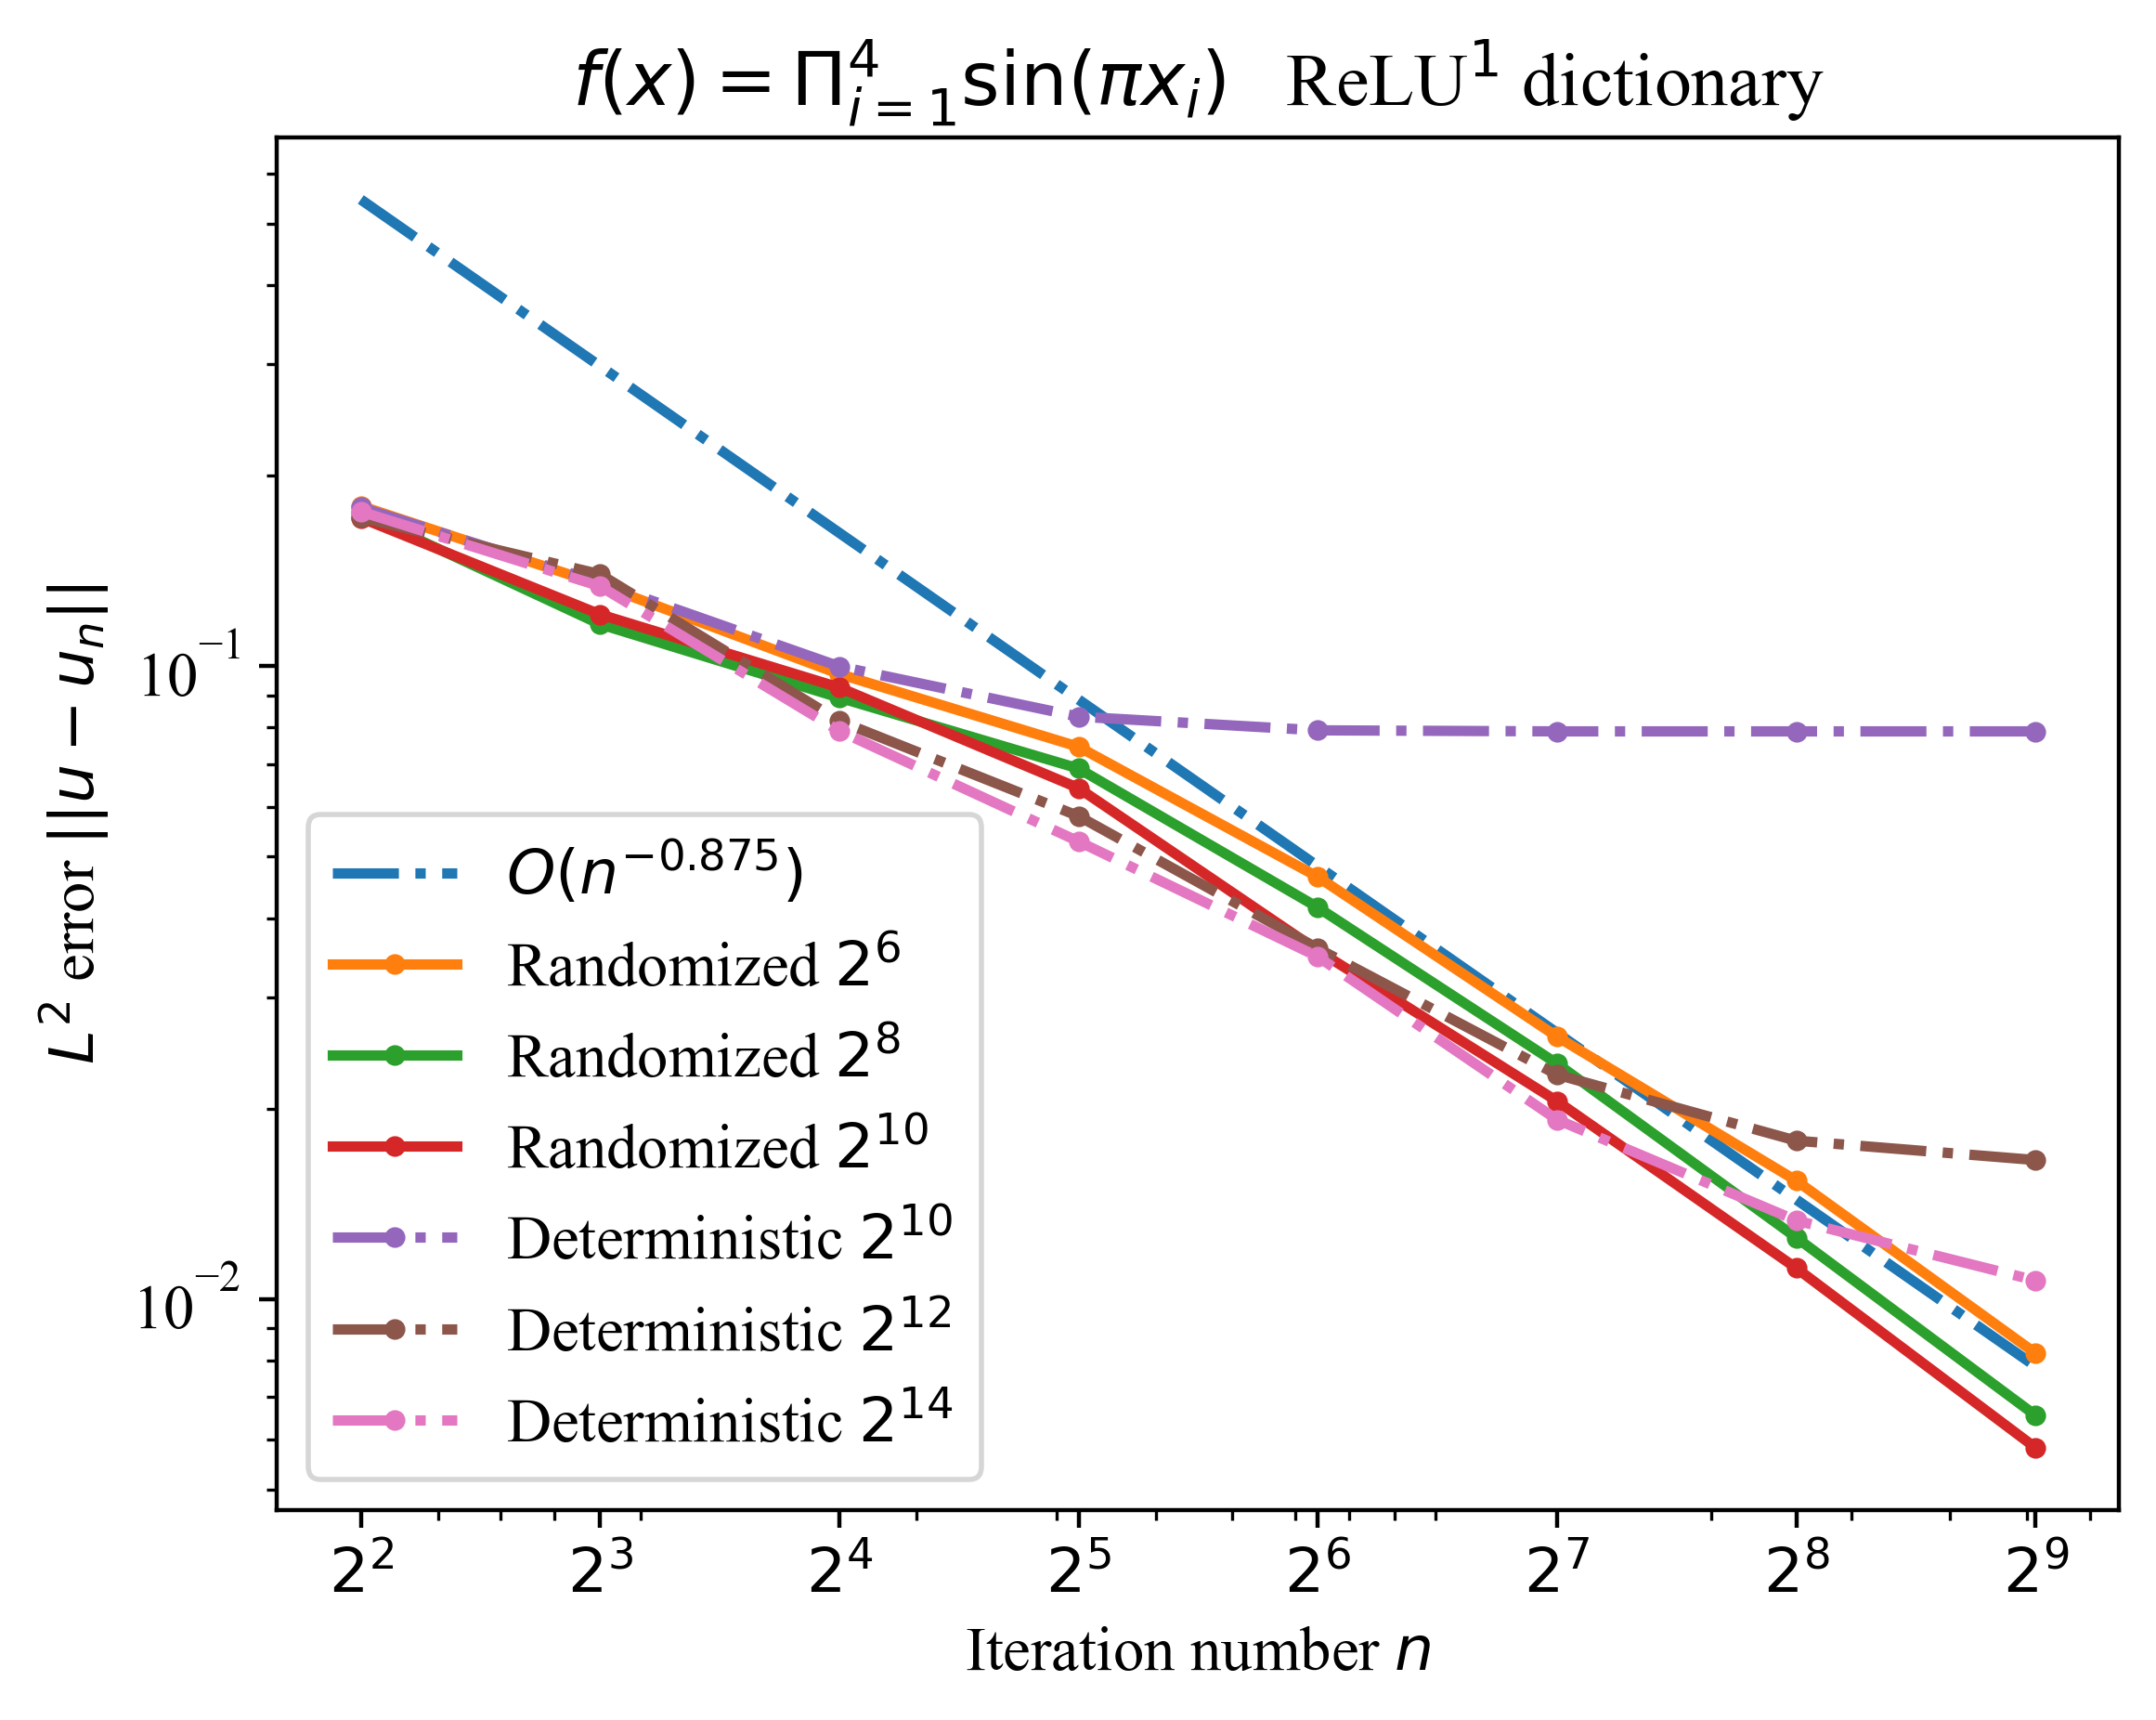

In [6]:
filename = "4D_sinpix1x2x3x4_rand_deter_relu1_Dict_compare.png"
fig_title = "$f(x) = \Pi_{{i=1}}^4 \sin(\pi x_i)$" 
k = 1
d = 4 
plot_err_vs_neurons(k,d,err_list_relu_1_rand,err_list_relu_1_deterministic,filename,fig_title, exponent = 9, save = True, rescale_ref=3.05)

## ex2 

In [7]:
folder = 'ex2/'
experiment_label = 'ex2'
# Load data 
err_list_relu_4_rand = []
for k in [4]: 
    for s in [2**1,2**2,2**3,2**4, 2**5]: 
        N0 = 2**5 
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,s * N0))

        filename = folder + experiment_label +"_err_randDict_relu_{}_size_{}_num_neurons_{}.pt".format(k,s * N0,num_epochs)
        err = torch.load(filename)  
        err_list_relu_4_rand.append(err)  
        print_convergence_order(err,exponent+1) 

print() 
print("deterministic dictionary")
print() 

folder = 'ex2/'
experiment_label = 'ex2'
err_list_relu_4_deterministic = []

for k in [4]: 
    for N in [2**10, 2**12,2**14,2**16]: 
        if N ==2**16:
            continue 
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,N))

        filename = folder + experiment_label +"_err_deterministic_Dict_relu_{}_size_{}_num_neurons_{}.pt".format(k,N,num_epochs)
        err = torch.load(filename)   
        err_list_relu_4_deterministic.append(err) 
        print_convergence_order(err,exponent+1) 

relu 4, dict size 64
neuron num 		 error 		 order
4		tensor(0.2046, dtype=torch.float64)		*
8		tensor(0.1624, dtype=torch.float64)		tensor(0.3335, dtype=torch.float64)
16		tensor(0.0583, dtype=torch.float64)		tensor(1.4786, dtype=torch.float64)
32		tensor(0.0484, dtype=torch.float64)		tensor(0.2661, dtype=torch.float64)
64		tensor(0.0104, dtype=torch.float64)		tensor(2.2183, dtype=torch.float64)
128		tensor(0.0047, dtype=torch.float64)		tensor(1.1588, dtype=torch.float64)
256		tensor(0.0009, dtype=torch.float64)		tensor(2.3064, dtype=torch.float64)
512		tensor(0.0002, dtype=torch.float64)		tensor(2.3491, dtype=torch.float64)
relu 4, dict size 128
neuron num 		 error 		 order
4		tensor(0.2002, dtype=torch.float64)		*
8		tensor(0.1689, dtype=torch.float64)		tensor(0.2458, dtype=torch.float64)
16		tensor(0.0596, dtype=torch.float64)		tensor(1.5023, dtype=torch.float64)
32		tensor(0.0481, dtype=torch.float64)		tensor(0.3093, dtype=torch.float64)
64		tensor(0.0099, dtype=torch.float64)		ten

0

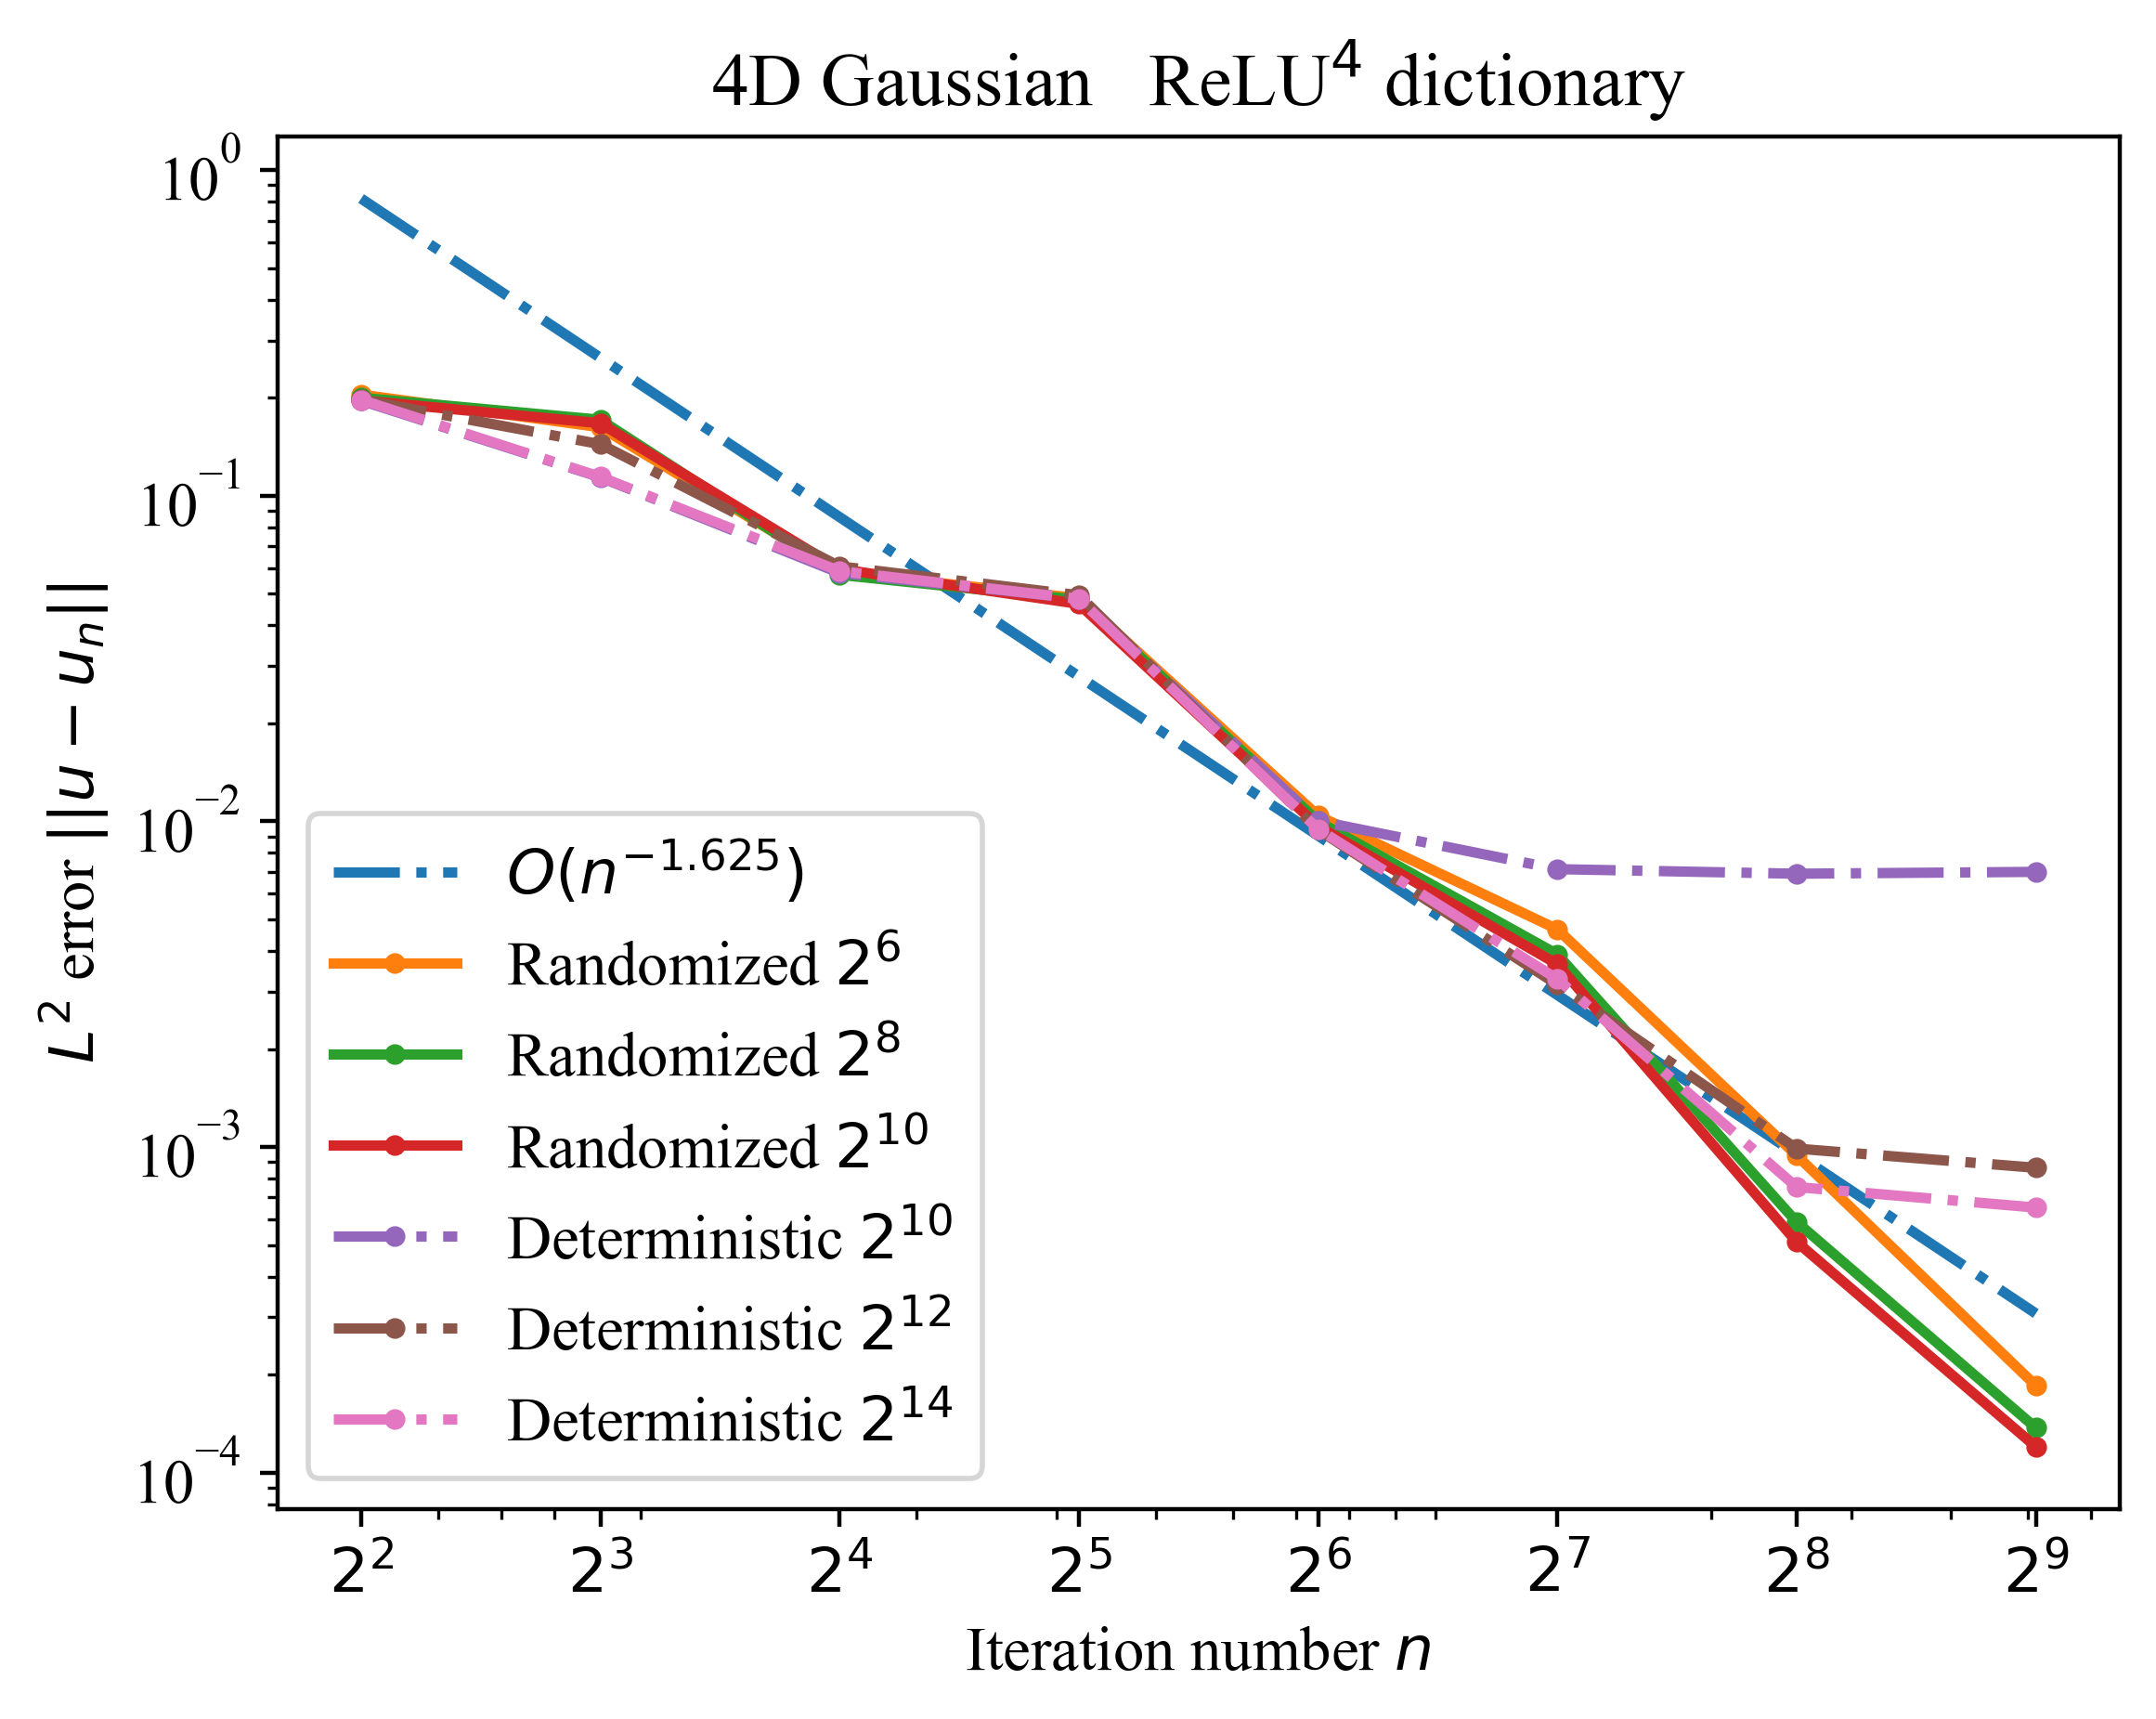

In [8]:
## plot results 
## read data: 
exponent = 9 
k = 4 
d = 4 
filename = "4D_gaussian_rand_deter_relu4_Dict_compare.png"
fig_title = '4D Gaussian'
save =  True 
plot_err_vs_neurons(k,d,err_list_relu_4_rand,err_list_relu_4_deterministic,filename, fig_title, exponent = 9, save = save, rescale_ref=4)
# rate = -1/2 - (2 * k + 1)/(2 * d)


In [9]:
folder = 'ex2/'
experiment_label = 'ex2'
# Load data 
err_list_relu_1_rand = []
for k in [1]: 
    for s in [2**1,2**2,2**3,2**4, 2**5]: 
        N0 = 2**5 
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,s * N0))

        filename = folder + experiment_label +"_err_randDict_relu_{}_size_{}_num_neurons_{}.pt".format(k,s * N0,num_epochs)
        err = torch.load(filename)  
        err_list_relu_1_rand.append(err)  
        print_convergence_order(err,exponent+1) 

print() 
print("deterministic dictionary")
print() 

folder = 'ex2/'
experiment_label = 'ex2'
err_list_relu_1_deterministic = []

for k in [1]: 
    for N in [2**10, 2**12,2**14,2**16]: 
        if N ==2**16:
            continue 
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,N))

        filename = folder + experiment_label +"_err_deterministic_Dict_relu_{}_size_{}_num_neurons_{}.pt".format(k,N,num_epochs)
        err = torch.load(filename)   
        err_list_relu_1_deterministic.append(err) 
        print_convergence_order(err,exponent+1) 

relu 1, dict size 64
neuron num 		 error 		 order
4		tensor(0.1640, dtype=torch.float64)		*
8		tensor(0.1250, dtype=torch.float64)		tensor(0.3915, dtype=torch.float64)
16		tensor(0.0606, dtype=torch.float64)		tensor(1.0439, dtype=torch.float64)
32		tensor(0.0378, dtype=torch.float64)		tensor(0.6823, dtype=torch.float64)
64		tensor(0.0201, dtype=torch.float64)		tensor(0.9133, dtype=torch.float64)
128		tensor(0.0110, dtype=torch.float64)		tensor(0.8705, dtype=torch.float64)
256		tensor(0.0057, dtype=torch.float64)		tensor(0.9416, dtype=torch.float64)
512		tensor(0.0030, dtype=torch.float64)		tensor(0.9531, dtype=torch.float64)
relu 1, dict size 128
neuron num 		 error 		 order
4		tensor(0.1559, dtype=torch.float64)		*
8		tensor(0.1271, dtype=torch.float64)		tensor(0.2947, dtype=torch.float64)
16		tensor(0.0556, dtype=torch.float64)		tensor(1.1937, dtype=torch.float64)
32		tensor(0.0312, dtype=torch.float64)		tensor(0.8352, dtype=torch.float64)
64		tensor(0.0180, dtype=torch.float64)		ten

0

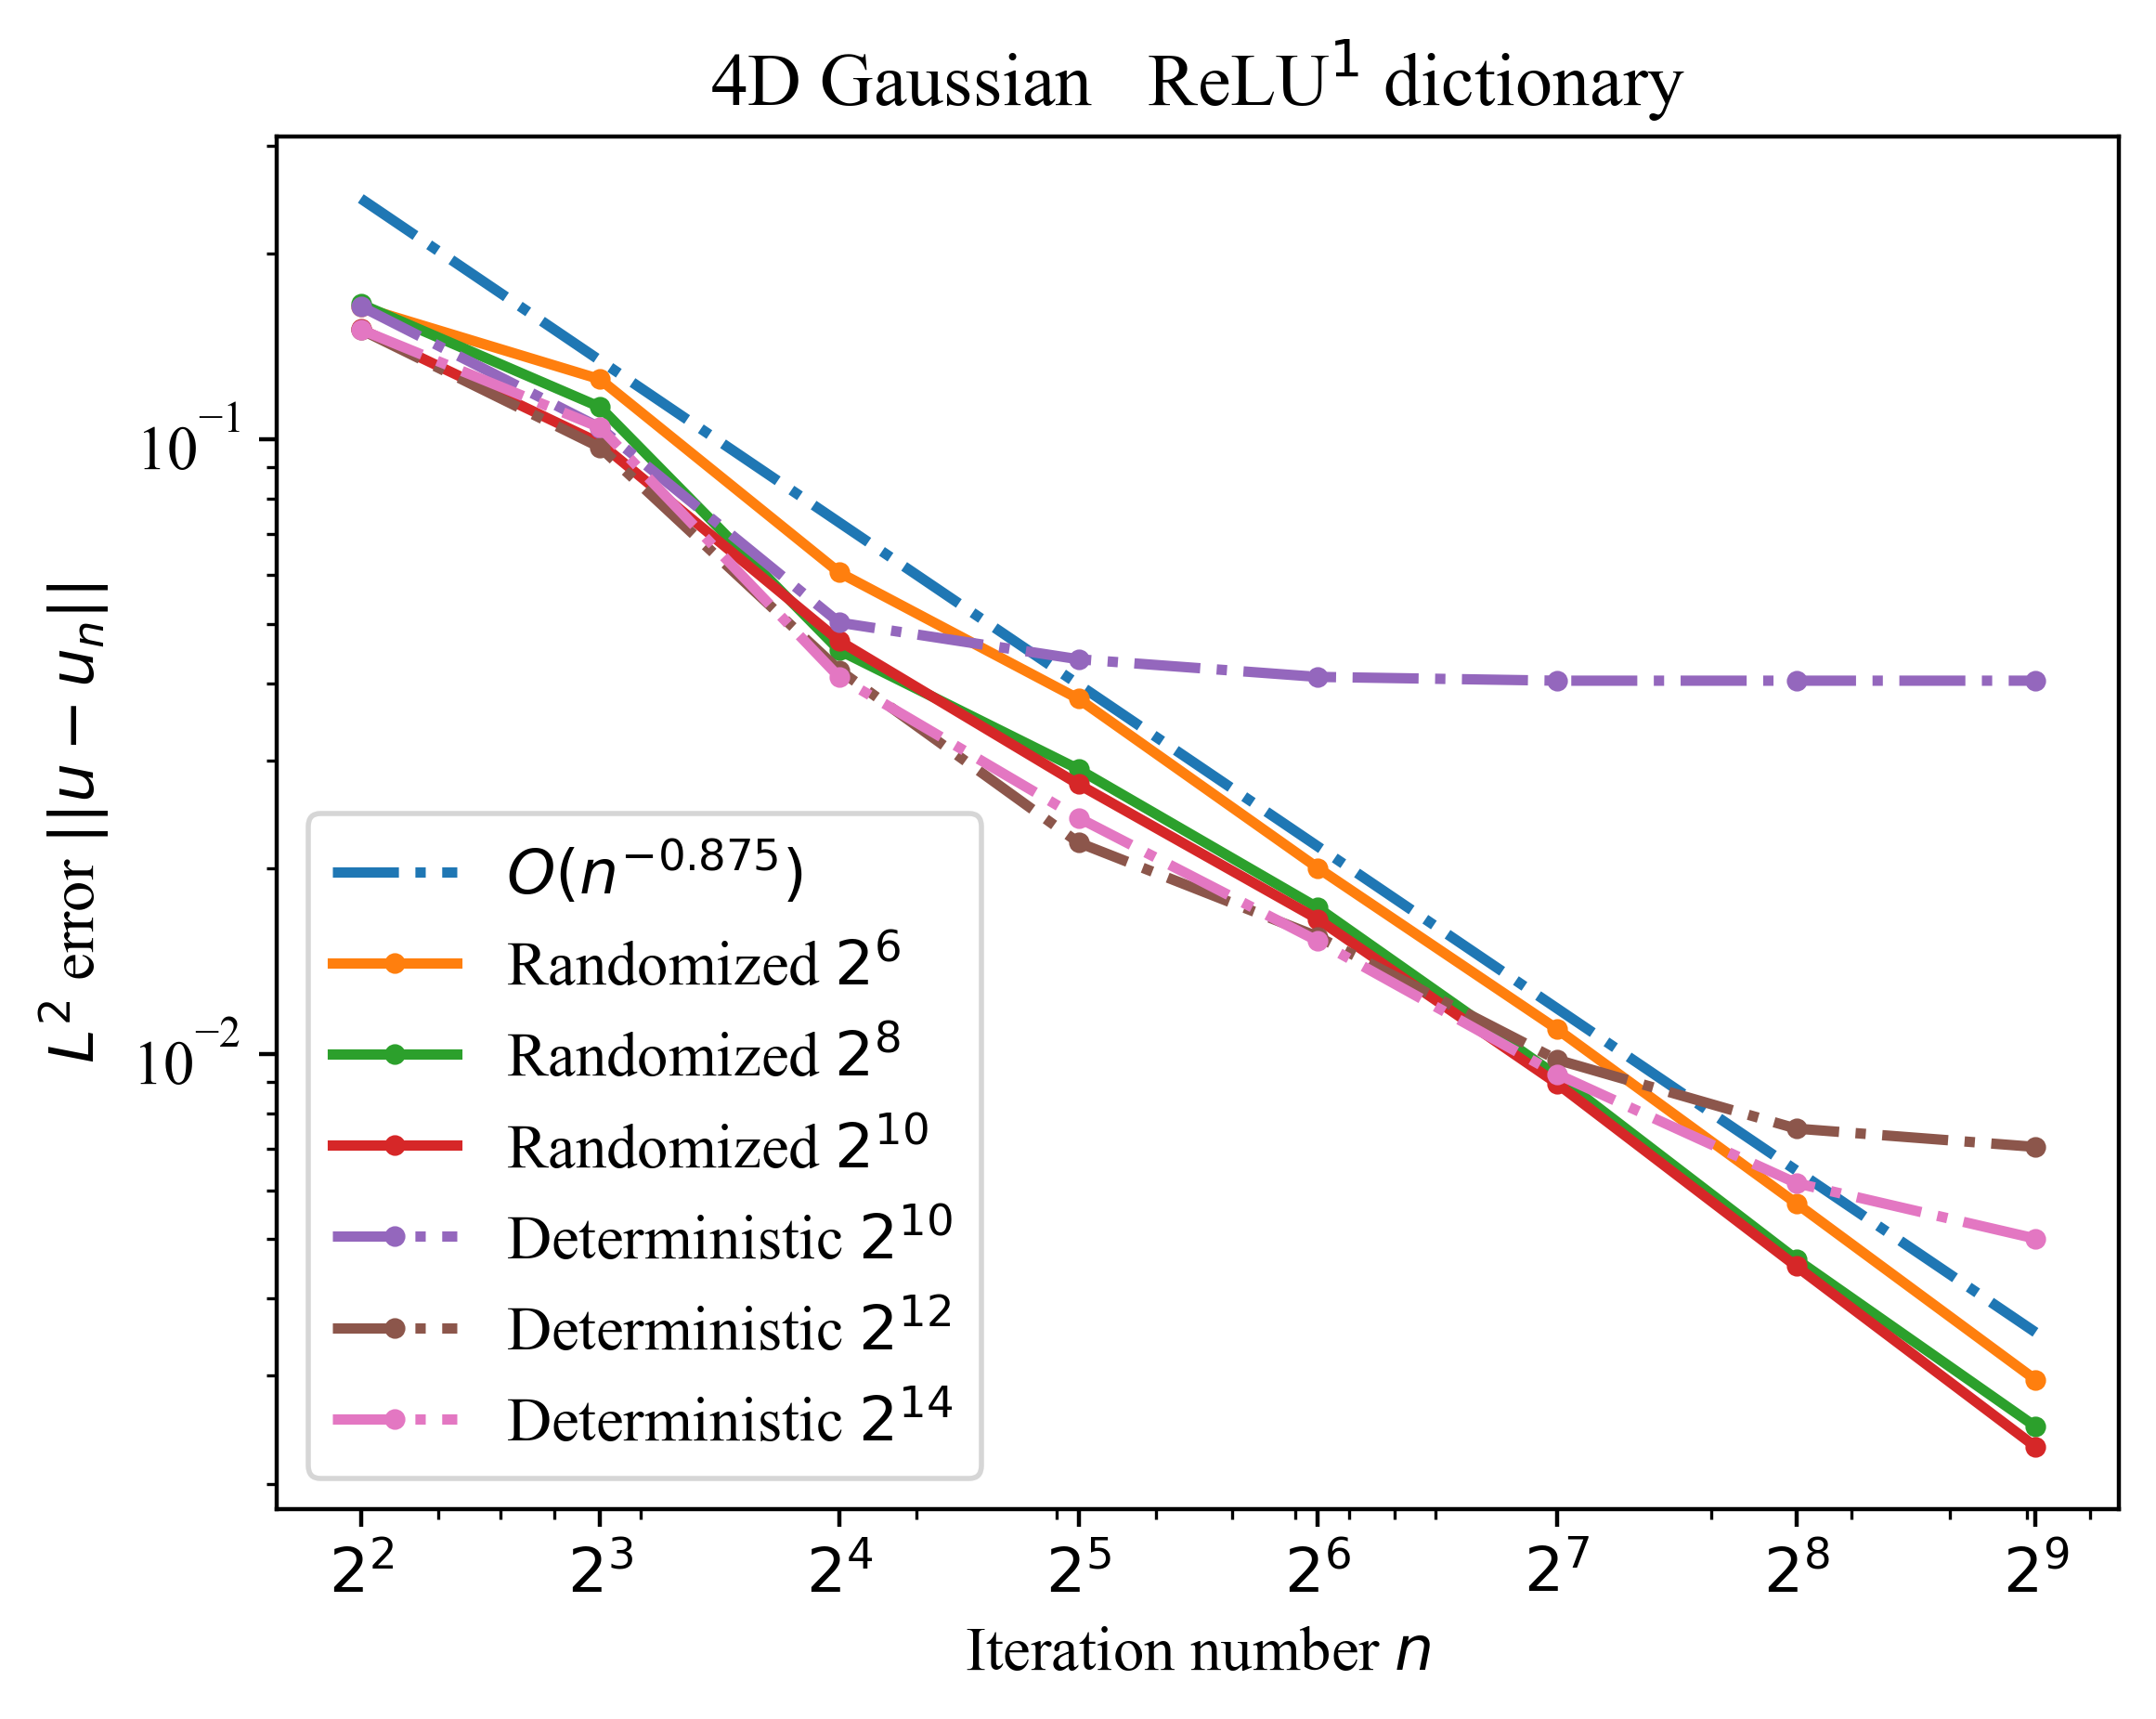

In [10]:
## plot results 
## read data: 
exponent = 9 
k = 1 
d = 4 
filename = "4D_gaussian_rand_deter_relu1_Dict_compare.png"
fig_title = '4D Gaussian'
save =  True   
plot_err_vs_neurons(k,d,err_list_relu_1_rand,err_list_relu_1_deterministic,filename, fig_title, exponent = 9, save = save, rescale_ref=1.5)
# rate = -1/2 - (2 * k + 1)/(2 * d)


In [11]:
folder = 'ex3/'
experiment_label = 'ex3'
# Load data 
for k in [1,4]: 
    for s in [2**4, 2**5]: 
        N0 = 2**5 
        exponent = 9  
        num_epochs=  2**exponent 
        print("relu {}, dict size {}".format(k,s * N0))

        filename = folder + experiment_label +"_err_randDict_relu_{}_size_{}_num_neurons_{}.pt".format(k,s * N0,num_epochs)
        err = torch.load(filename)   
        print_convergence_order(err,exponent+1) 



relu 1, dict size 512
neuron num 		 error 		 order
4		tensor(0.0084, dtype=torch.float64)		*
8		tensor(0.0037, dtype=torch.float64)		tensor(1.1819, dtype=torch.float64)
16		tensor(0.0013, dtype=torch.float64)		tensor(1.4817, dtype=torch.float64)
32		tensor(0.0007, dtype=torch.float64)		tensor(0.8407, dtype=torch.float64)
64		tensor(0.0003, dtype=torch.float64)		tensor(1.2088, dtype=torch.float64)
128		tensor(0.0001, dtype=torch.float64)		tensor(1.1892, dtype=torch.float64)
256		tensor(7.9589e-05, dtype=torch.float64)		tensor(0.8227, dtype=torch.float64)
512		tensor(3.8734e-05, dtype=torch.float64)		tensor(1.0390, dtype=torch.float64)
relu 1, dict size 1024
neuron num 		 error 		 order
4		tensor(0.0083, dtype=torch.float64)		*
8		tensor(0.0026, dtype=torch.float64)		tensor(1.7023, dtype=torch.float64)
16		tensor(0.0013, dtype=torch.float64)		tensor(0.9894, dtype=torch.float64)
32		tensor(0.0006, dtype=torch.float64)		tensor(1.1270, dtype=torch.float64)
64		tensor(0.0003, dtype=torch.flo